In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [2]:
#pre-pruning
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2']
}
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
cv = GridSearchCV(model, parameter, scoring='accuracy')
cv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [3]:
best_model = cv.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

In [4]:
y_pred = cv.predict(iris.data)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
score = accuracy_score(y_pred, iris.target)
score

0.96

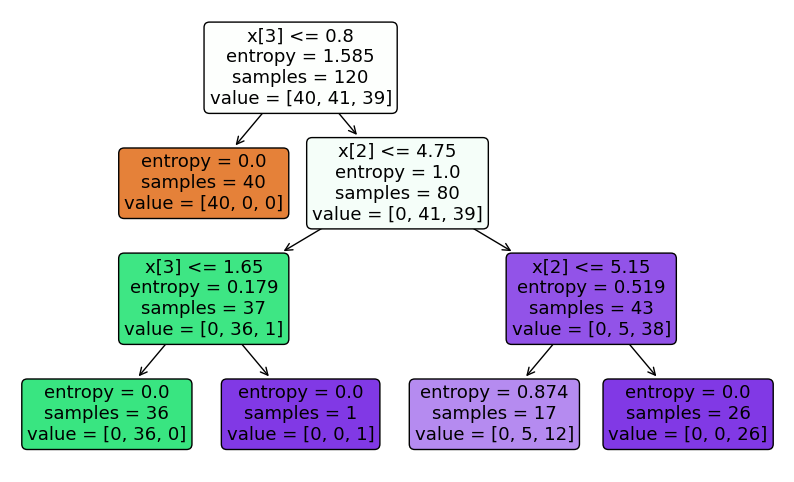

In [6]:
plt.figure(figsize=(10, 6))
plot_tree(best_model, feature_names=None, class_names=None, filled=True, rounded=True)
plt.show()

In [7]:
#post-pruning
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.00809524, 0.01111111, 0.01111111, 0.01621622,
       0.0241196 , 0.24326537, 0.33340278])

In [8]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

In [9]:
accuracies = []
for clf in clfs:
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
accuracies

[1.0, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.6333333333333333, 0.3]

In [10]:
#optimal_alpha = ccp_alphas[accuracies.index(max(accuracies))]
optimal_alpha = ccp_alphas[4]
optimal_alpha

0.01621621621621623

In [11]:
final_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=optimal_alpha)
final_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01621621621621623, random_state=0)

In [12]:
y_pred_final = final_tree.predict(x_test)
final_accuracy = accuracy_score(y_test, y_pred_final)
final_accuracy

1.0

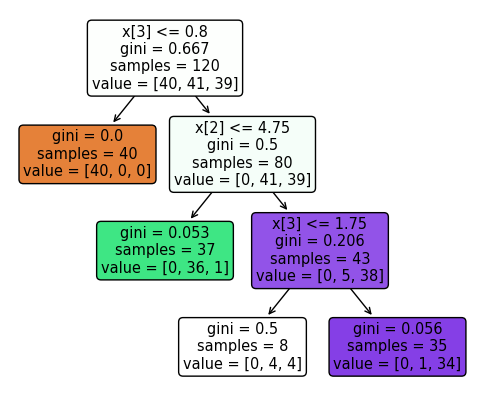

In [13]:
plt.figure(figsize=(6, 5))
plot_tree(final_tree, filled=True, feature_names=None, class_names=None, rounded=True)
plt.show()

In [14]:
#without pruning
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(iris.data)
score2=accuracy_score(y_pred1, iris.target)
score2

1.0

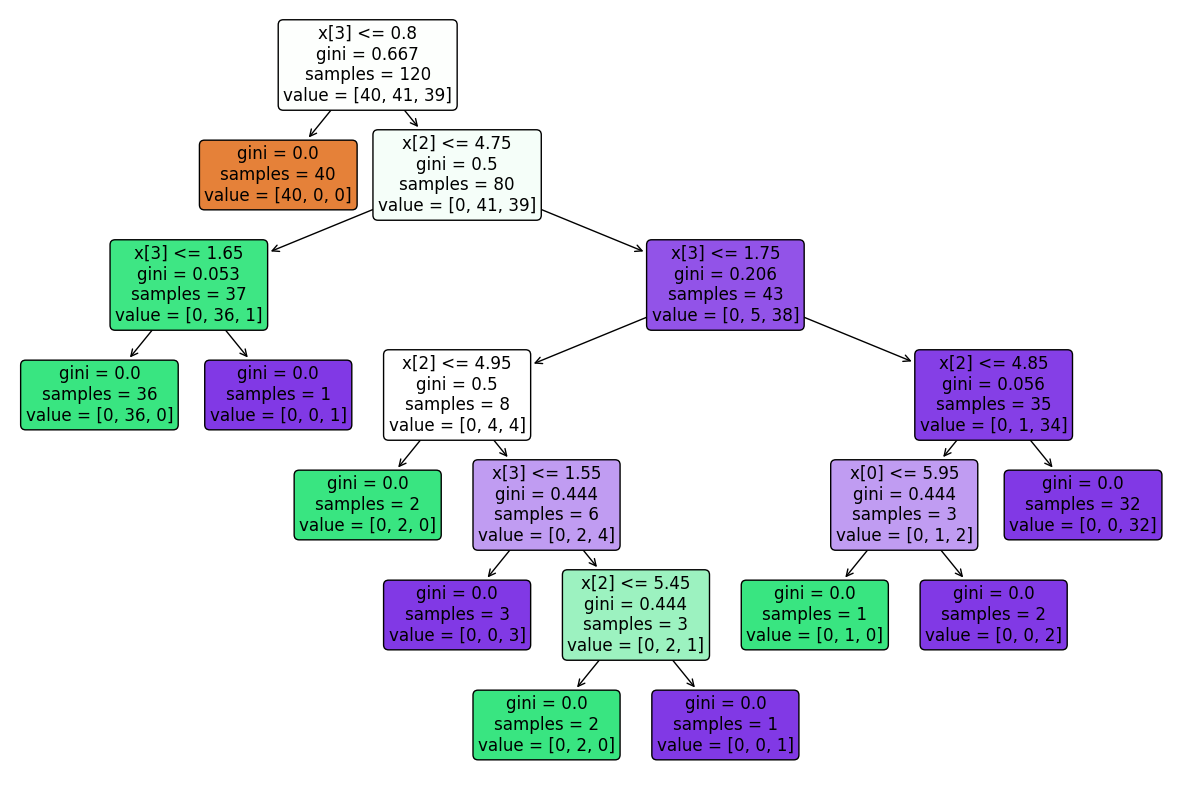

In [15]:
plt.figure(figsize=(15, 10))
plot_tree(model1, filled=True, feature_names=None, class_names=None, rounded=True)
plt.show()